<a href="https://colab.research.google.com/github/Sohan-2001/QSAR_Aquatic_Toxicity/blob/main/QSAR_aquatic_toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
df=pd.read_csv('/content/qsar_aquatic_toxicity.csv',sep=';')
print(df)

          0      0.1  0.2  2.419  1.225  0.667  0.3  0.4  3.740
0      0.00    0.000    0  2.638  1.401  0.632    0    0  4.330
1      9.23   11.000    0  5.799  2.930  0.486    0    0  7.019
2      9.23   11.000    0  5.453  2.887  0.495    0    0  6.723
3      9.23   11.000    0  4.068  2.758  0.695    0    0  5.979
4    215.34  327.629    3  0.189  4.677  1.333    0    4  6.064
..      ...      ...  ...    ...    ...    ...  ...  ...    ...
540   24.06   35.776    2  3.326  2.837  0.849    2    0  4.651
541    9.23   11.000    0  3.275  2.727  0.874    0    0  3.953
542    0.00    0.000    0  5.165  3.111  0.732    0    0  6.219
543   13.14    9.507    0  2.859  2.614  0.827    0    0  4.995
544    0.00    0.000    0  2.255  1.800  0.917    0    0  2.480

[545 rows x 9 columns]


In [55]:
# Looks like the data dont have header, reload it with header
df = pd.read_csv("/content/qsar_aquatic_toxicity.csv", sep=";", names=['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040', 'quantitative response'])
df.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


In [56]:
df.isna().sum()

TPSA(Tot)                0
SAacc                    0
H-050                    0
MLOGP                    0
RDCHI                    0
GATS1p                   0
nN                       0
C-040                    0
quantitative response    0
dtype: int64

In [66]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Define the features and the target
X = df.drop('quantitative response', axis=1)
y = df['quantitative response']

# Convert the target to binary classification (1 for values above median, 0 for below)
median_value = y.median()
y = (y > median_value).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classifier
svc = SVC(kernel='linear')

# Train the classifier
svc.fit(X_train, y_train)

# Predict on the test set
y_predsvc = svc.predict(X_test)

# Generate a classification report
reportSVM = classification_report(y_test, y_predsvc)

# Print the classification report
print(reportSVM)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        60
           1       0.76      0.76      0.76        50

    accuracy                           0.78       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.78      0.78      0.78       110



In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the features and the target
X = df.drop('quantitative response', axis=1)
y = df['quantitative response']

# Convert the target to binary classification (1 for values above median, 0 for below)
median_value = y.median()
y = (y > median_value).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
cart = DecisionTreeClassifier()

# Train the classifier
cart.fit(X_train, y_train)

# Predict on the test set
y_predcart = cart.predict(X_test)

# Generate a classification report
reportCART = classification_report(y_test, y_predcart)

# Print the classification report
print(reportCART)


              precision    recall  f1-score   support

           0       0.76      0.78      0.77        60
           1       0.73      0.70      0.71        50

    accuracy                           0.75       110
   macro avg       0.74      0.74      0.74       110
weighted avg       0.74      0.75      0.74       110



In [68]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the features and the target
X = df.drop('quantitative response', axis=1)
y = df['quantitative response']

# Convert the target to binary classification (1 for values above median, 0 for below)
median_value = y.median()
y = (y > median_value).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_predknn = knn.predict(X_test)

# Generate a classification report
reportKNN = classification_report(y_test, y_predknn)

# Print the classification report
print(reportKNN)


              precision    recall  f1-score   support

           0       0.76      0.83      0.79        60
           1       0.77      0.68      0.72        50

    accuracy                           0.76       110
   macro avg       0.77      0.76      0.76       110
weighted avg       0.76      0.76      0.76       110



In [69]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Define the features and the target
X = df.drop('quantitative response', axis=1)
y = df['quantitative response']

# Convert the target to binary classification (1 for values above median, 0 for below)
median_value = y.median()
y = (y > median_value).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Predict on the test set using the best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Generate a classification report
reportKNC = classification_report(y_test, y_pred)

# Print the classification report
print(reportKNC)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.7271421107628003
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        60
           1       0.79      0.74      0.76        50

    accuracy                           0.79       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.79      0.79      0.79       110



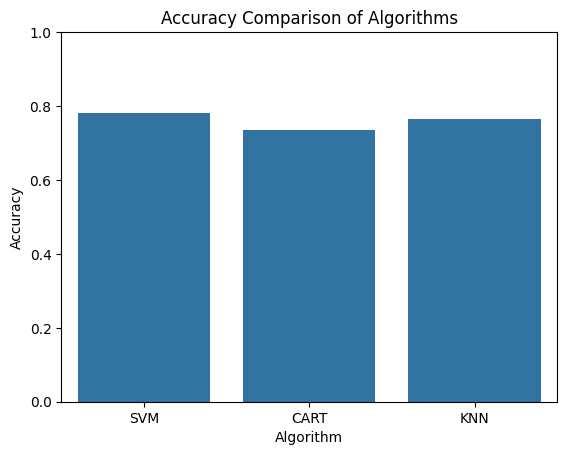

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Define the features and the target
X = df.drop('quantitative response', axis=1)
y = df['quantitative response']

# Convert the target to binary classification (1 for values above median, 0 for below)
median_value = y.median()
y = (y > median_value).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
svc = SVC(kernel='linear')
cart = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifiers
svc.fit(X_train, y_train)
cart.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)
y_pred_cart = cart.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy scores
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_cart = accuracy_score(y_test, y_pred_cart)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Create a DataFrame with accuracy scores
accuracy_df = pd.DataFrame({
    'Algorithm': ['SVM', 'CART', 'KNN'],
    'Accuracy': [accuracy_svc, accuracy_cart, accuracy_knn]
})

# Plot the accuracy scores using seaborn
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison of Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis to show accuracy from 0 to 1
plt.show()
